# Mount To Drive

In [1]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# Flight Dataset Analysis

> This dataset reports flights in the United States, including carriers, arrival and departure delays, and reasons for delays, from 1987 to 2008.

## Data Wrangling

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


> Loading the dataset 

In [ ]:
folder = '/content/drive/My Drive/competitions/Flight Data Analysis/data'

files = ['ONTIME_REPORTING_5_2020.csv', 'ONTIME_REPORTING_4_2020.csv', 'ONTIME_REPORTING_3_2020.csv', 
         'ONTIME_REPORTING_2_2020.csv', 'ONTIME_REPORTING_1_2020.csv']

dfs = [pd.read_csv(os.path.join(folder, file)) for file in files]

In [ ]:
data = pd.concat(dfs, axis=0)
data.head()

YEAR  MONTH  DAY_OF_MONTH  ...  SECURITY_DELAY LATE_AIRCRAFT_DELAY Unnamed: 27
0  2020      5             9  ...             NaN                 NaN         NaN
1  2020      5             9  ...             NaN                 NaN         NaN
2  2020      5             9  ...             NaN                 NaN         NaN
3  2020      5             9  ...             NaN                 NaN         NaN
4  2020      5             9  ...             NaN                 NaN         NaN

[5 rows x 28 columns]

get statistics about the data

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 414053 entries, 0 to 112167
Data columns (total 28 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   YEAR                 414053 non-null  int64  
 1   MONTH                414053 non-null  int64  
 2   DAY_OF_MONTH         414053 non-null  int64  
 3   DAY_OF_WEEK          414053 non-null  int64  
 4   FL_DATE              414053 non-null  object 
 5   OP_UNIQUE_CARRIER    414053 non-null  object 
 6   OP_CARRIER_FL_NUM    414053 non-null  int64  
 7   ORIGIN_AIRPORT_ID    414053 non-null  int64  
 8   ORIGIN               414053 non-null  object 
 9   ORIGIN_CITY_NAME     414053 non-null  object 
 10  ORIGIN_STATE_ABR     414053 non-null  object 
 11  DEST_AIRPORT_ID      414053 non-null  int64  
 12  DEST                 414053 non-null  object 
 13  DEST_CITY_NAME       414053 non-null  object 
 14  DEST_STATE_ABR       414053 non-null  object 
 15  DEP_TIME         

#### drop unneeded columns

In [ ]:
data = data.drop(columns=['Unnamed: 27', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 
                          'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 414053 entries, 0 to 112167
Data columns (total 22 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   YEAR               414053 non-null  int64  
 1   MONTH              414053 non-null  int64  
 2   DAY_OF_MONTH       414053 non-null  int64  
 3   DAY_OF_WEEK        414053 non-null  int64  
 4   FL_DATE            414053 non-null  object 
 5   OP_UNIQUE_CARRIER  414053 non-null  object 
 6   OP_CARRIER_FL_NUM  414053 non-null  int64  
 7   ORIGIN_AIRPORT_ID  414053 non-null  int64  
 8   ORIGIN             414053 non-null  object 
 9   ORIGIN_CITY_NAME   414053 non-null  object 
 10  ORIGIN_STATE_ABR   414053 non-null  object 
 11  DEST_AIRPORT_ID    414053 non-null  int64  
 12  DEST               414053 non-null  object 
 13  DEST_CITY_NAME     414053 non-null  object 
 14  DEST_STATE_ABR     414053 non-null  object 
 15  DEP_TIME           367962 non-null  float64
 16  DE

#### dealing with missing data

one of the best ways to deal with `NANs` is fill them with mean, median or mode. maybe filling them with **mean** will be the best method here.

In [ ]:
data.isnull().sum()

YEAR                     0
MONTH                    0
DAY_OF_MONTH             0
DAY_OF_WEEK              0
FL_DATE                  0
OP_UNIQUE_CARRIER        0
OP_CARRIER_FL_NUM        0
ORIGIN_AIRPORT_ID        0
ORIGIN                   0
ORIGIN_CITY_NAME         0
ORIGIN_STATE_ABR         0
DEST_AIRPORT_ID          0
DEST                     0
DEST_CITY_NAME           0
DEST_STATE_ABR           0
DEP_TIME             46091
DEP_DELAY            46096
ARR_TIME             46290
ARR_DELAY            46804
CANCELLED                0
DIVERTED                 0
DISTANCE                 0
dtype: int64

In [ ]:
data.fillna(data.mean(), inplace=True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414053 entries, 0 to 414052
Data columns (total 23 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         414053 non-null  int64  
 1   YEAR               414053 non-null  int64  
 2   MONTH              414053 non-null  int64  
 3   DAY_OF_MONTH       414053 non-null  int64  
 4   DAY_OF_WEEK        414053 non-null  int64  
 5   FL_DATE            414053 non-null  object 
 6   OP_UNIQUE_CARRIER  414053 non-null  object 
 7   OP_CARRIER_FL_NUM  414053 non-null  int64  
 8   ORIGIN_AIRPORT_ID  414053 non-null  int64  
 9   ORIGIN             414053 non-null  object 
 10  ORIGIN_CITY_NAME   414053 non-null  object 
 11  ORIGIN_STATE_ABR   414053 non-null  object 
 12  DEST_AIRPORT_ID    414053 non-null  int64  
 13  DEST               414053 non-null  object 
 14  DEST_CITY_NAME     414053 non-null  object 
 15  DEST_STATE_ABR     414053 non-null  object 
 16  DE

**well done!** There is no empty fields in our data. 

### We want to add new feature `week` to our dataframe

In [6]:
def add_week(day):
    week = int((day - 1)/7) + 1
    if day > 27:
        week = 4
    return week


# add week column to the dataframe
data['week'] = data.apply(lambda row: add_week(row['DAY_OF_MONTH']), axis=1)

In [7]:
data.head()

Unnamed: 0  YEAR  MONTH  DAY_OF_MONTH  ...  CANCELLED DIVERTED DISTANCE  week
0           0  2020      5             9  ...        0.0      0.0    223.0     2
1           1  2020      5             9  ...        0.0      0.0    223.0     2
2           2  2020      5             9  ...        0.0      0.0    223.0     2
3           3  2020      5             9  ...        0.0      0.0    236.0     2
4           4  2020      5             9  ...        0.0      0.0    236.0     2

[5 rows x 24 columns]

we want to divide numerical features from categorical features in order to easier usage in the analysis

In [8]:
categorical_cols = data.select_dtypes('object').columns
numeric_cols = data.columns.difference(categorical_cols)

In [9]:
categorical_cols

Index(['FL_DATE', 'OP_UNIQUE_CARRIER', 'ORIGIN', 'ORIGIN_CITY_NAME',
       'ORIGIN_STATE_ABR', 'DEST', 'DEST_CITY_NAME', 'DEST_STATE_ABR'],
      dtype='object')

In [10]:
numeric_cols

Index(['ARR_DELAY', 'ARR_TIME', 'CANCELLED', 'DAY_OF_MONTH', 'DAY_OF_WEEK',
       'DEP_DELAY', 'DEP_TIME', 'DEST_AIRPORT_ID', 'DISTANCE', 'DIVERTED',
       'MONTH', 'OP_CARRIER_FL_NUM', 'ORIGIN_AIRPORT_ID', 'Unnamed: 0', 'YEAR',
       'week'],
      dtype='object')

### What is the structure of your dataset?

> There are 414053 rows in the dataset after cleaning. with 21 features (all features are **numeric** except 8 features are **categorical**)

### What is/are the main feature(s) of interest in your dataset?

> I'm interested in figuring out what are best for predicting the flight is cancelled or not. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect some numeric features will have a big impact on the final prediction like: `MONTH`, `week`, `DELAY` and `DISTANCE` and some categorical features like: `FL_DATE`

## Univariate Exploration

> In this section, we will investigate distributions of individual variables. we will start by looking at the distribution of the main variable of interest

Text(0.5, 1.0, 'Number of Flights in Each Day of The Month')

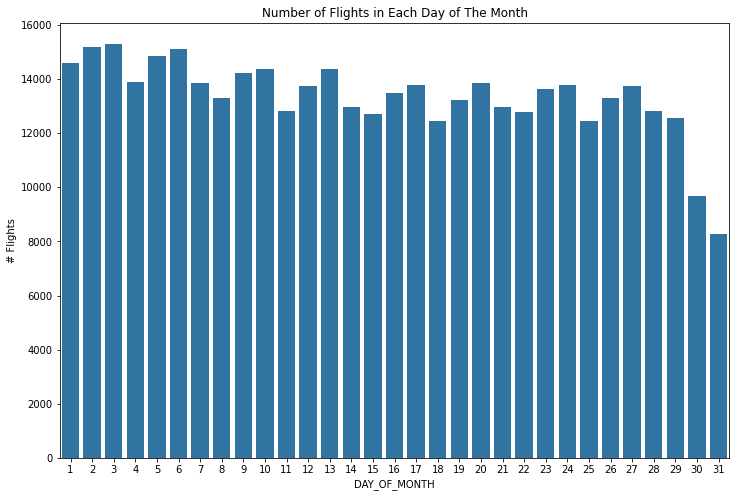

In [ ]:
plt.figure(figsize=(12,8))

color = sns.color_palette()[0]

sns.countplot(data=data, x='DAY_OF_MONTH', color=color)

plt.ylabel('# Flights')
plt.title('Number of Flights in Each Day of The Month')

it seems that there are small spikes in the frequency almost after every 4 days, and frequencies slowly trails off until the next spike. but overall indication that number of flights starts with a high rate in the beginning of the month, then decreases slowly until end of the month.

Text(0.5, 1.0, 'Number of Flights in Each Day of The Week')

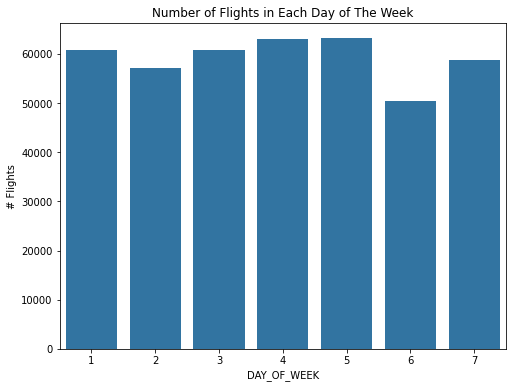

In [ ]:
plt.figure(figsize=(8,6))

color = sns.color_palette()[0]

sns.countplot(data=data, x='DAY_OF_WEEK', color=color)

plt.ylabel('# Flights')
plt.title('Number of Flights in Each Day of The Week')

it seems that the highest rates of flights are in the middle of the week. and it decreases clearly in the last 2 days of the week.

let's see the most carriers that have the largest number of flights

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

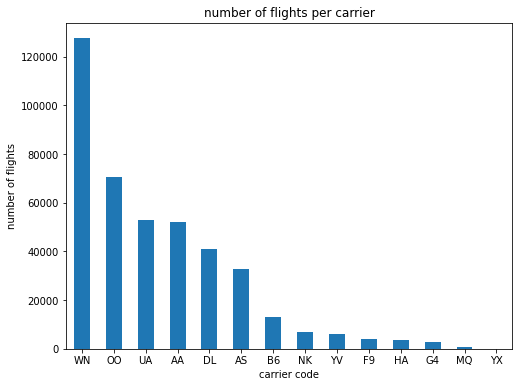

In [ ]:
plt.figure(figsize=(8, 6))

data.OP_UNIQUE_CARRIER.value_counts().plot(kind='bar')

plt.xlabel('carrier code')
plt.ylabel('number of flights')
plt.title('number of flights per carrier')
plt.xticks(rotation=0)

Next up, 
let's see where are the most airports that have the most number of flights to and from.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

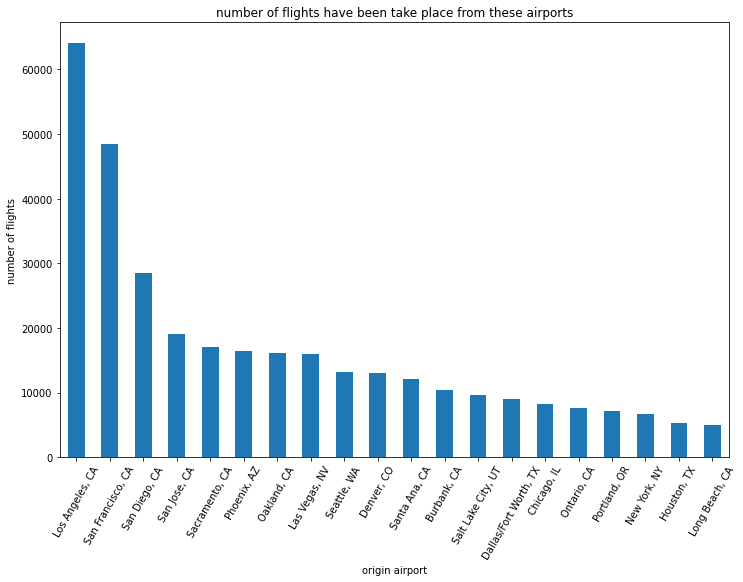

In [ ]:
plt.figure(figsize=(12,8))

# let's see the largest 20 airport
data.ORIGIN_CITY_NAME.value_counts()[:20].plot(kind='bar');

plt.xlabel('origin airport')
plt.ylabel('number of flights')
plt.title('number of flights have been take place from these airports')
plt.xticks(rotation=60)

we will do the same with destination airports

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

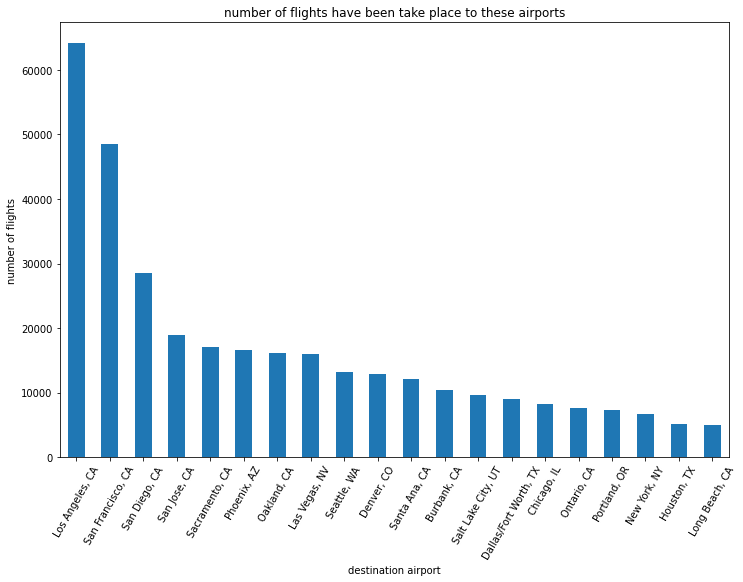

In [ ]:
plt.figure(figsize=(12,8))

# let's see the largest 20 airport
data.DEST_CITY_NAME.value_counts()[:20].plot(kind='bar');

plt.xlabel('destination airport')
plt.ylabel('number of flights')
plt.title('number of flights have been take place to these airports')
plt.xticks(rotation=60)

it seems that nearly the maximun number of flights have been taken place are from these same airports. and also they nearly have the same number of flights (to and from).

let's see the `DELAY` distribution in the arrival and departure of flights.

Text(0.5, 1.0, 'Difference in minutes between scheduled and actual departure time.')

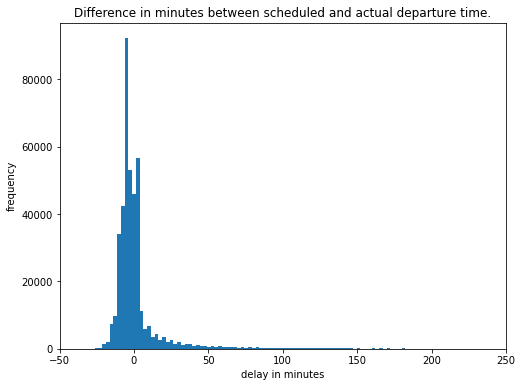

In [ ]:
plt.figure(figsize=(8,6))

plt.hist(data.DEP_DELAY, bins=1000);

plt.xlim(-50, 250)
plt.xlabel('delay in minutes')
plt.ylabel('frequency')
plt.title('Difference in minutes between scheduled and actual departure time.')

large number of bins here shows a nearly normal distributed data (right skewed) 

let's do the same with arrival flights

Text(0.5, 1.0, 'Difference in minutes between scheduled and actual arrival time.')

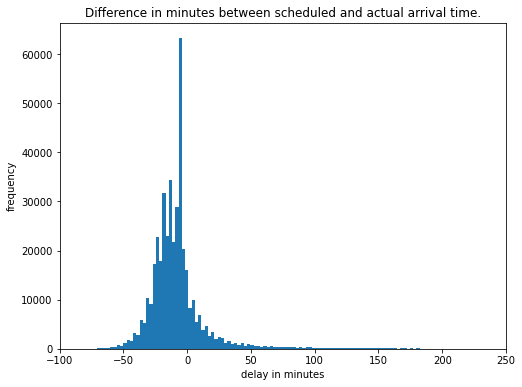

In [ ]:
plt.figure(figsize=(8,6))
plt.hist(data.ARR_DELAY, bins=1000);
plt.xlim(-100, 250)
plt.xlabel('delay in minutes')
plt.ylabel('frequency')
plt.title('Difference in minutes between scheduled and actual arrival time.')

same here! the two distributions are *unimodal* and with large number of bins it seems to have a normal distribution 

we can investigate also in the distribution of `DISTANCE`

Text(0.5, 1.0, 'Distance in miles between origin and distination airports.')

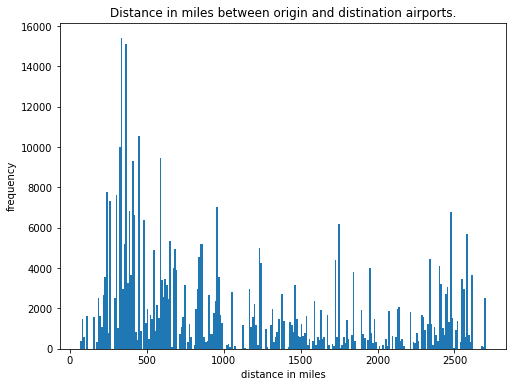

In [ ]:
plt.figure(figsize=(8,6))

plt.hist(data.DISTANCE, bins=250);

plt.xlabel('distance in miles')
plt.ylabel('frequency')
plt.title('Distance in miles between origin and distination airports.')

Distribution here seems to be *multimodal* and it significantly right skewed with many spikes, most of the distances around 500 miles. 

let's move on and see how many flights are cancelled and how many are approved?

Text(0.5, 1.0, 'Number of cancelled vs non-cancelled flighs')

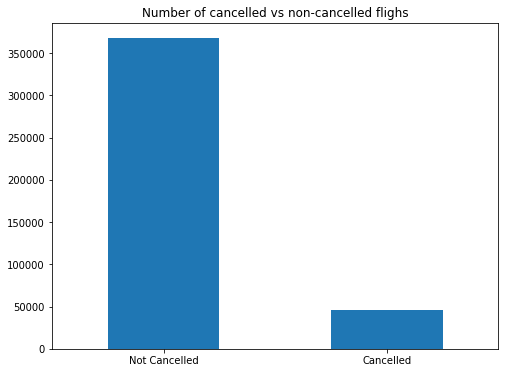

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))

data.CANCELLED.value_counts().plot(kind='bar')

# change the xtick labels
ax.set_xticklabels(['Not Cancelled', 'Cancelled'], rotation=0)

plt.title('Number of cancelled vs non-cancelled flighs')

number of cancelled flights is small and it seems intuitively because most of the flights happens in the biggest airports. 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> `DELAY` has a unimodal distribution with one peak, but `DISTANCE` seems to have multimodal distribution with many peaks and spikes. and I think we don't need to apply transformation here.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> number of outliers were identified when investigating the distributions of the `DELAY` and `DISTANCE`. I tried to ignore them and focus on the important values by applying *xlim* on the x-axis.

## Bivariate Exploration

> In this section, we will investigate relationships between pairs of variables in your
data. 

To start off, we want to look at the pairwise correlation between numeric variables.

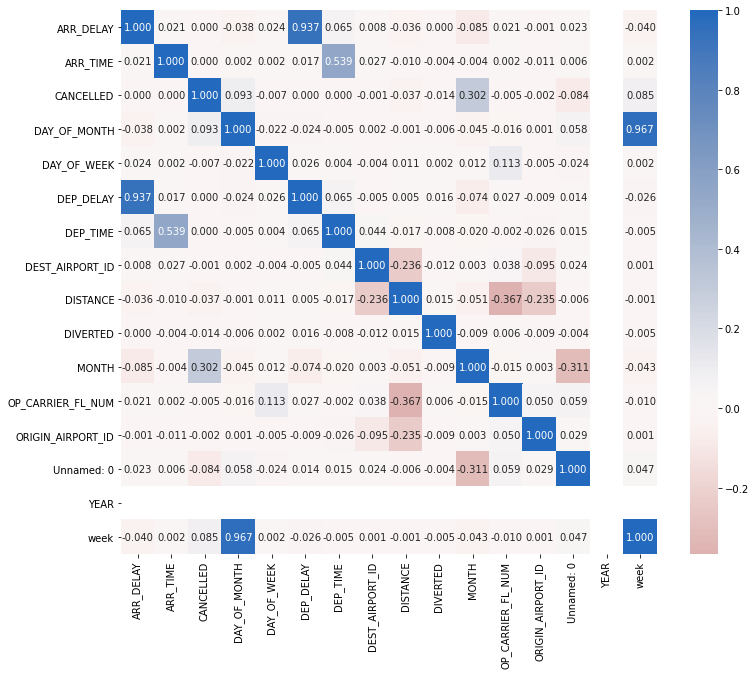

In [11]:
plt.figure(figsize=(12,10))

sns.heatmap(data[numeric_cols].corr(), annot=True, fmt='.3f', cmap='vlag_r', center=0)

from this heatmap it seems that most of the variables has no strong correlations between each others. we can remove some variables with no correlation and concentrate on other variables that have some positive or negative correlation. 

In [12]:
selected_cols = numeric_cols.difference(['Unnamed: 0', 'YEAR', 'MONTH', 'OP_CARRIER_FL_NUM', 'DEST_AIRPORT_ID', 'ORIGIN_AIRPORT_ID', 'DIVERTED'])

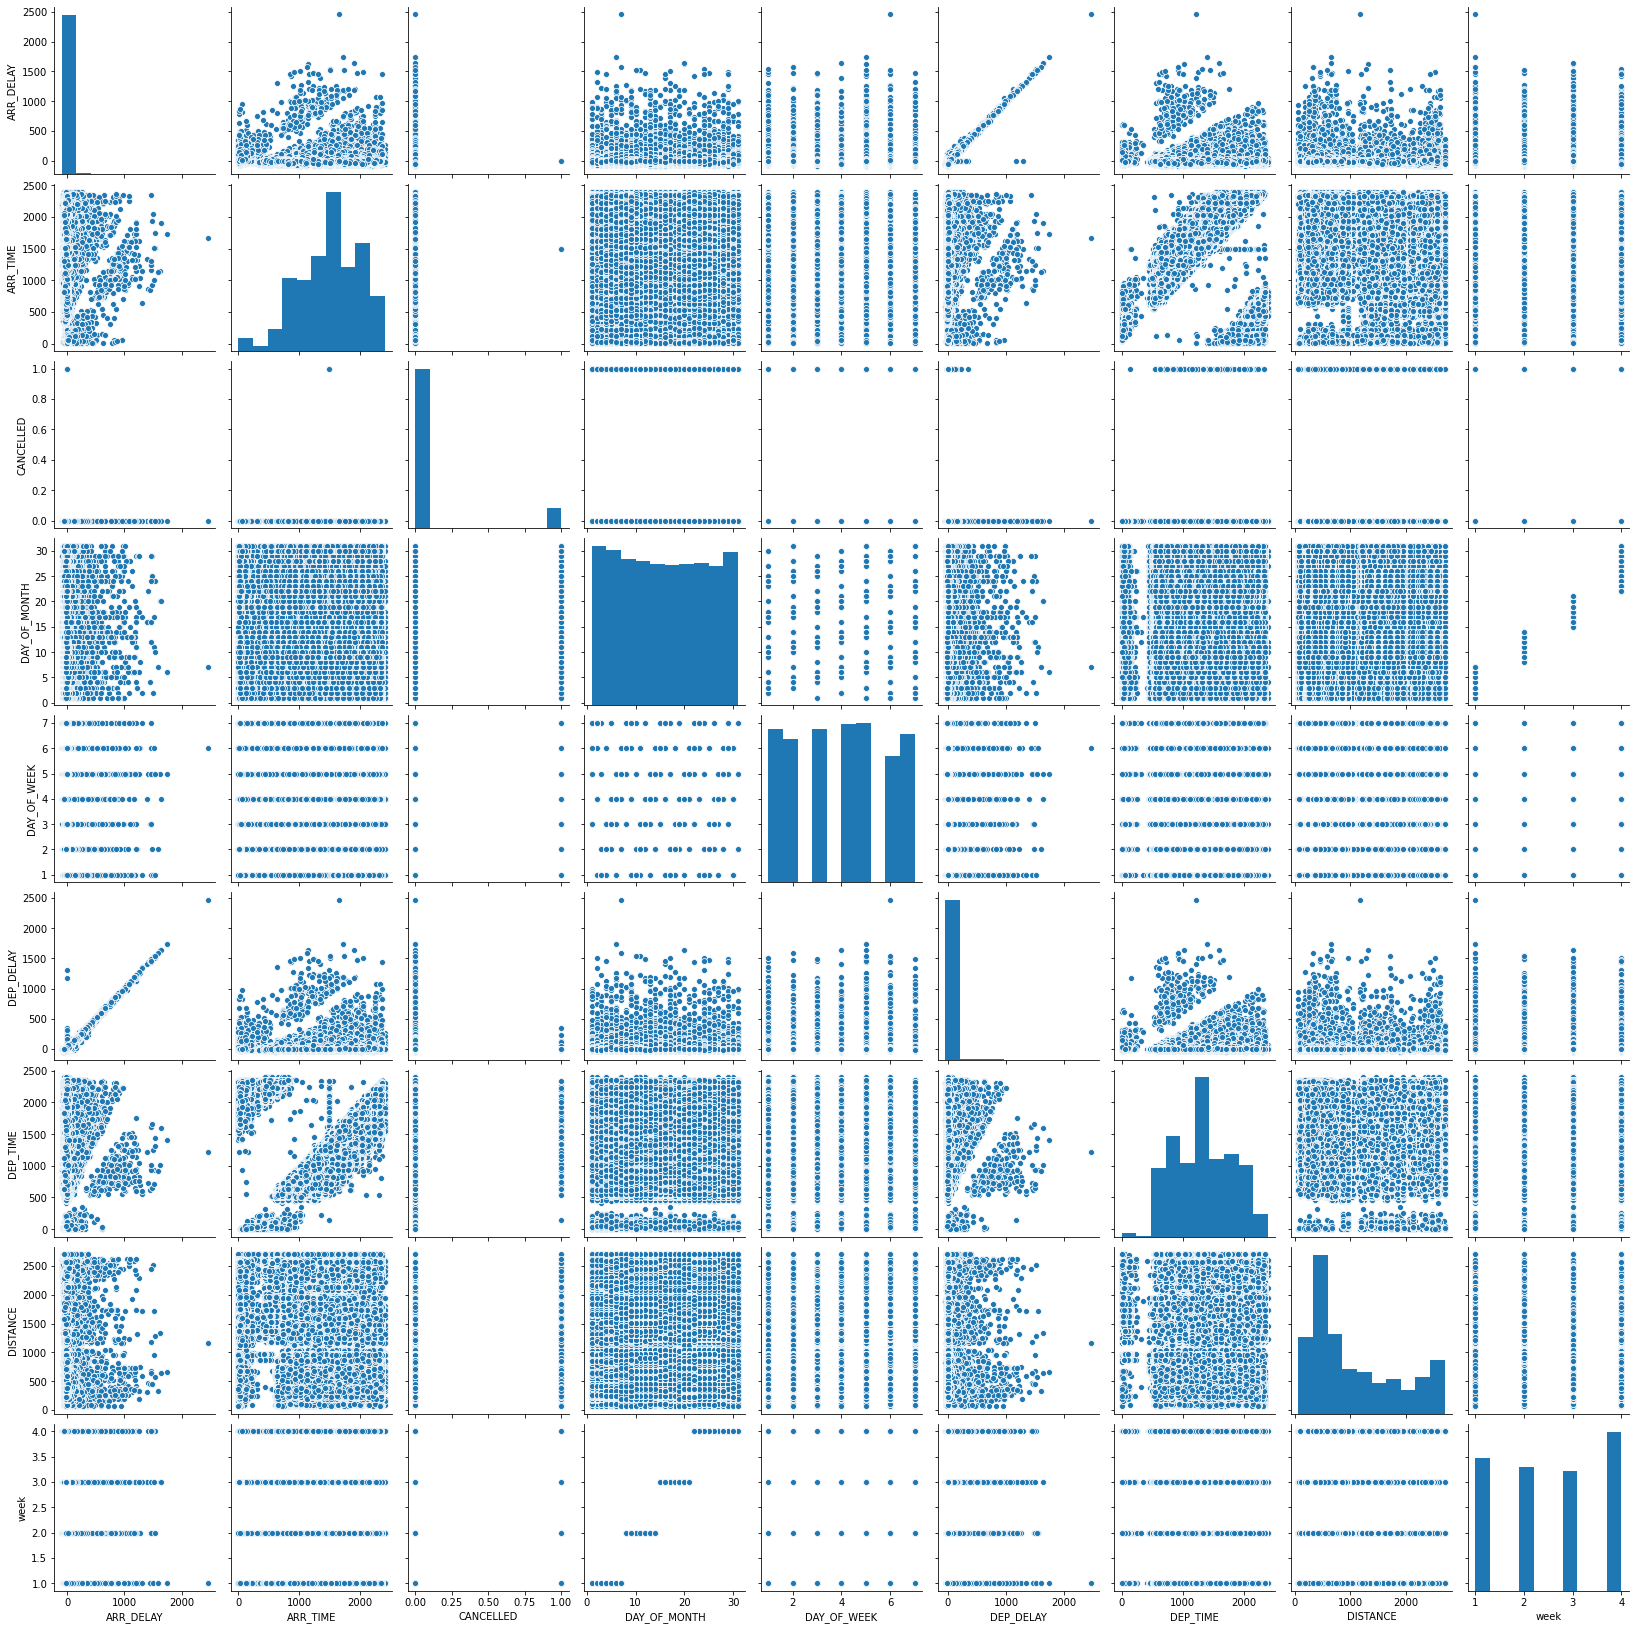

In [13]:
sns.pairplot(data=data, vars=selected_cols)

this pairplot proves that `DEP_TIME` has a strong correlation with `ARR_TIME` as well as `DEP_DELAY` with `ARR_DELAY`


let's see the number of flights in each month distributed by weeks.

Text(0.5, 1.0, 'number of flights per month')

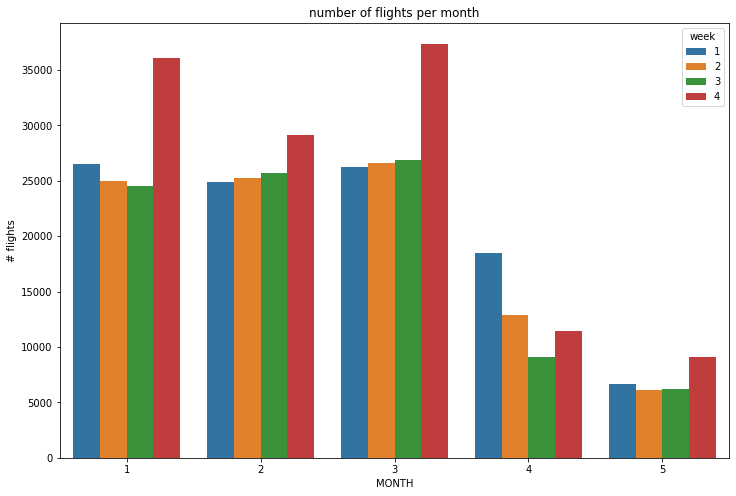

In [ ]:
plt.figure(figsize=(12,8))

sns.countplot(data=data, x='MONTH', hue='week')

plt.ylabel('# flights')
plt.title('number of flights per month')

It's very clear that number of flights have decreased significantly in the last two months. and usually the last week of each month have the largest number of flights over all weeks.

As we have time series data for 5 months, we want to draw a **line plot** to show a more accurate representation of the flights per each month. to do this we want to make a sub dataframe which will have the date of all days and the number of flights have been happened in this day.

In [ ]:
date_freq = data['FL_DATE'].value_counts().sort_index().reset_index(name='frequency').rename(columns={'index':'date'})
date_freq

date  frequency
0    2020-01-01       3773
1    2020-01-02       3998
2    2020-01-03       4011
3    2020-01-04       3442
4    2020-01-05       3904
..          ...        ...
147  2020-05-27        880
148  2020-05-28        920
149  2020-05-29        941
150  2020-05-30        839
151  2020-05-31        966

[152 rows x 2 columns]

Text(0.5, 1.0, 'Number of fights per Month')

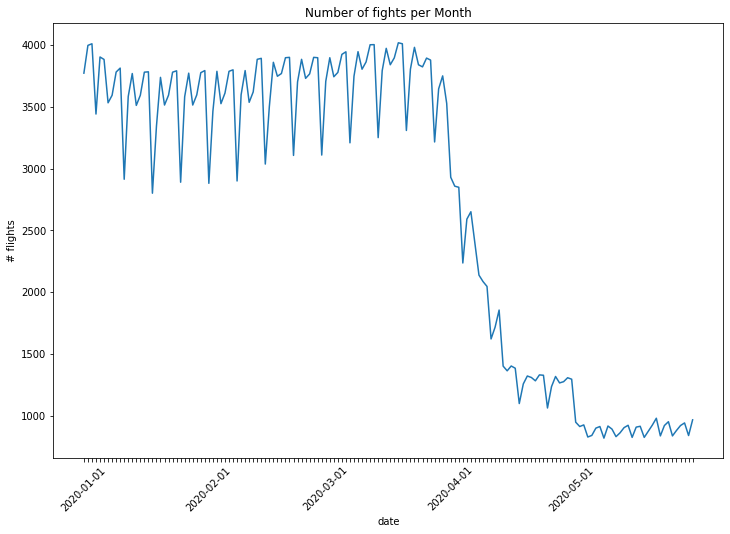

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))

sns.lineplot(x=date_freq['date'], y=date_freq['frequency'])

# put a text label on the x-axis 
plt.xticks(date_freq.index, date_freq['date'], rotation=45)

# write only the first day of each month on the x-axis
for i, date in enumerate(ax.xaxis.get_ticklabels()):
    if datetime.strptime(date.get_text(), '%Y-%m-%d').day != 1:
        date.set_visible(False) 

plt.ylabel('# flights')
plt.title('Number of fights per Month')

The result seems intuitively after we have seen the previous graph, maybe this is more accurate but it has the same result of the previous graph.

let's focus slightly with the `CANCELLED` feature. and see for each month, how many flights are cancelled?

Text(0.5, 1.0, 'number of cancelled flights per month')

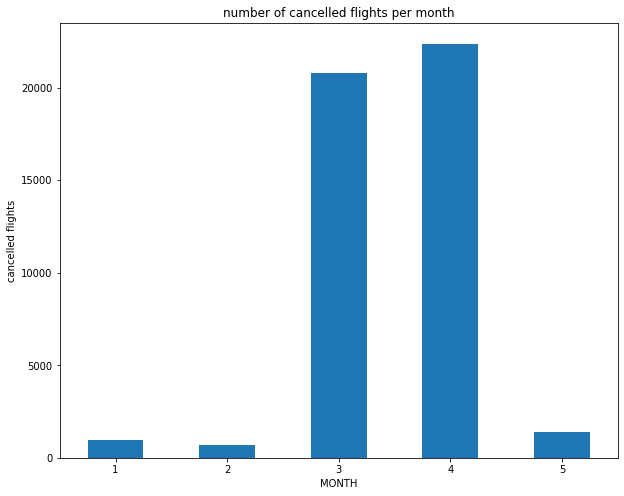

In [ ]:
plt.figure(figsize=(10,8))

data.groupby('MONTH')['CANCELLED'].sum().plot(kind='bar')

plt.xticks(rotation=0)

plt.ylabel('cancelled flights')
plt.title('number of cancelled flights per month')

third and fourth months have a huge number of cancelled flights in a weired way! and this is unusual, so we want to investigate more why this happened in these two months.

we also want to show in which day of the month, number of cancelled flights were large? or in another word, to show number of cancelled flights per each day of the month. 

Text(0.5, 1.0, 'number of cancelled flights per each day in the month')

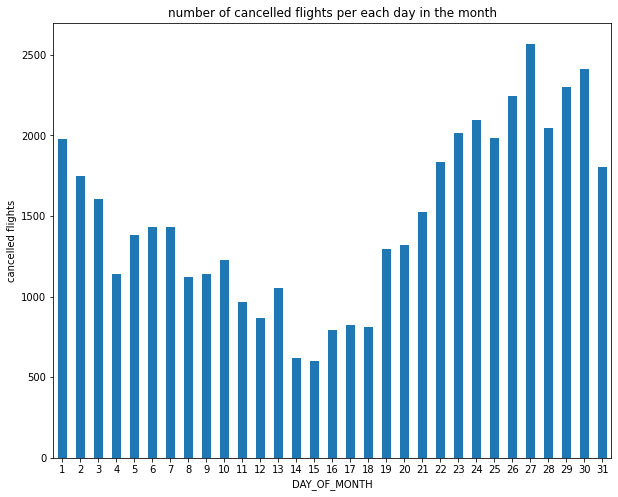

In [ ]:
plt.figure(figsize=(10,8))

data.groupby('DAY_OF_MONTH')['CANCELLED'].sum().plot(kind='bar')

plt.xticks(rotation=0)

plt.ylabel('cancelled flights')
plt.title('number of cancelled flights per each day in the month')

last days of each month, usually have the most number of cancelled flights throughout the month.

Text(0.5, 1.0, 'number of cancelled flights per each day in the month')

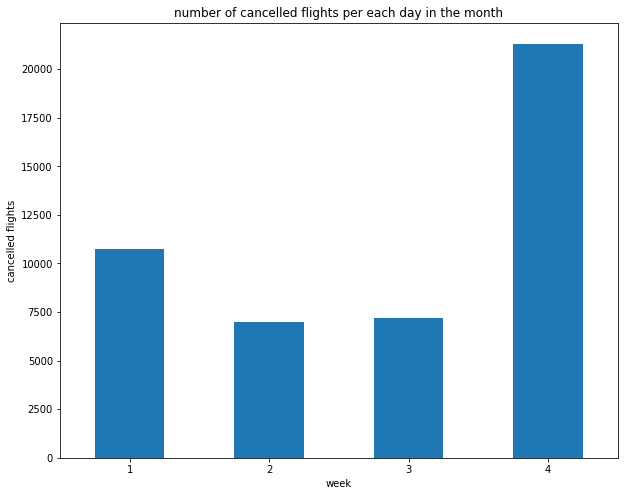

In [ ]:
plt.figure(figsize=(10,8))

data.groupby('week')['CANCELLED'].sum().plot(kind='bar')

plt.xticks(rotation=0)

plt.ylabel('cancelled flights')
plt.title('number of cancelled flights per each day in the month')

by distributing it for weeks, it seems a common sense to have this result as we estimate this from the previous graph.

With a bit of curiosity, we want to know in which days of the week to have more cancelled flights.

Text(0.5, 1.0, 'number of cancelled flights per month')

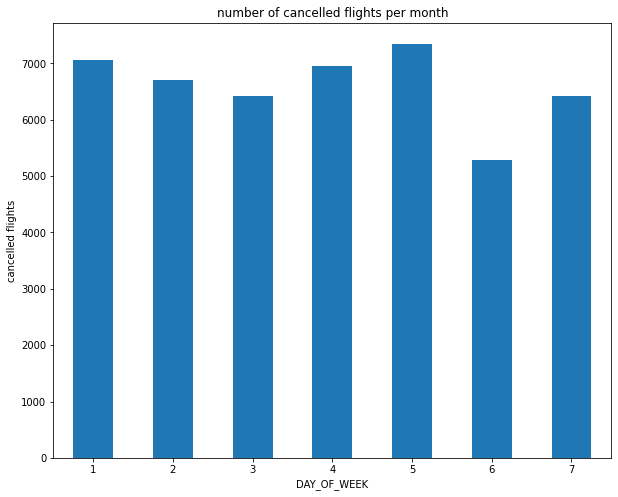

In [ ]:
plt.figure(figsize=(10,8))

data.groupby('DAY_OF_WEEK')['CANCELLED'].sum().plot(kind='bar')

plt.xticks(rotation=0)

plt.ylabel('cancelled flights')
plt.title('number of cancelled flights per month')

maybe first and middle of each week have many cancelled flights but it decreases a little bit at the end of each week.

let's move to another feature, let's see the distribution of `DISTANCE` per each month using a **boxplot**

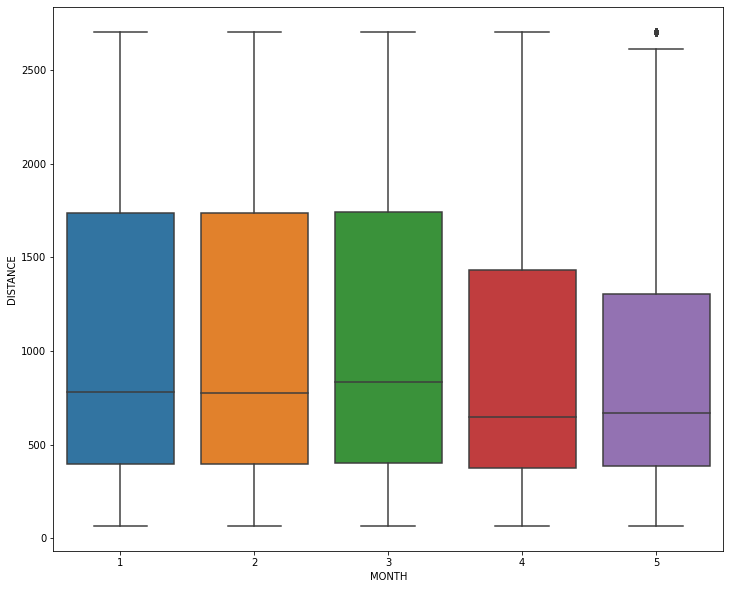

In [ ]:
plt.figure(figsize=(12,10))

sns.boxplot(data=data, x='MONTH', y='DISTANCE')

it seems that distance of flights between airports have decreased in the last two months.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Maybe we didn't investigate too much as this data is large and needs a lot of time investigating more and more features. but from the above investigation, `CANCELLED` feature was very important as we expected. only investigating a little bit in this feature, it answers a lot of questions in the dataset.
also `ARR_TIME` and `DEP_TIME` as well as `ARR_DELAY` and `DEP_DELAY` were have a strong correlation explained from the heatmap.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> I didn't investigate outside of these variables, but I expect investigating more in variables such as: `DAY_OF_MONTH`, `DAY_OF_WEEK` with `DISTANCE` will ask other many questions in this dataset.

## Multivariate Exploration

> Here we want to create plots of three or more variables to investigate our data even
further. 

**FacetGrid** one of the best ways to visualize multivariable in the dataset. so here we will start by showing the distribition of `DEP_TIME` and `ARR_TIME` for each `MONTH`

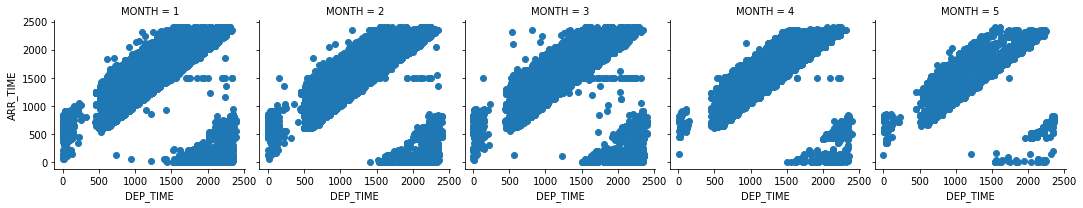

In [ ]:
fg = sns.FacetGrid(data=data, col='MONTH')
fg.map(plt.scatter, 'DEP_TIME', 'ARR_TIME')

it seems to have a strong correlation between these two variables for all months.

investigating the same with the `DEP_DELAY` and `ARR_DELAY` for each `MONTH`

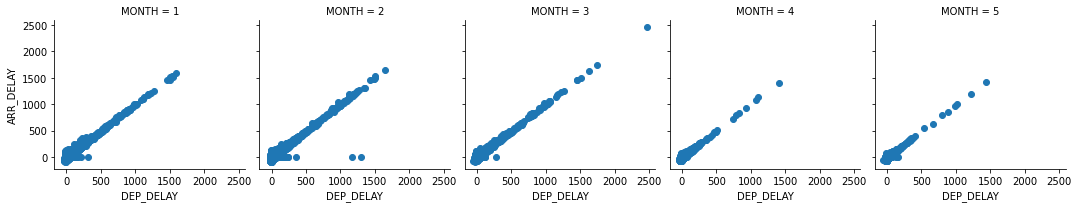

In [ ]:
fg = sns.FacetGrid(data=data, col='MONTH')
fg.map(plt.scatter, 'DEP_DELAY', 'ARR_DELAY')

also the same result here, they have a strong correlation for all months.

let's see the distribution of the `DISTANCE` with the `MONTH` for each week.

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:723: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 864x720 with 0 Axes>

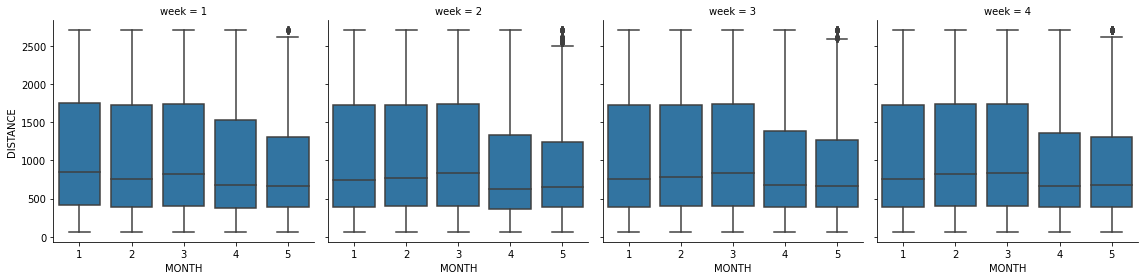

In [ ]:
fg = sns.FacetGrid(data=data, col='week', size=4)

fg.map(sns.boxplot, 'MONTH', 'DISTANCE')

the distance of flights decreases clearly in the last two months, and nearly it has the same distribution for all weeks.

let's see the same distribution between the `DISTANCE` and the `MONTH` but this time according to `CANCELLED` variable

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:723: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


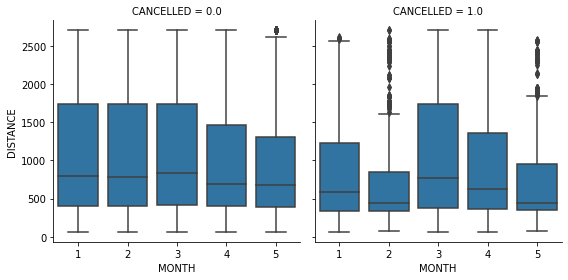

In [ ]:
fg = sns.FacetGrid(data=data, col='CANCELLED', size=4)

fg.map(sns.boxplot, 'MONTH', 'DISTANCE')

from this **boxplot**, we see that last three months have a little bit more amount of cancelled flights than the first two months.

maybe **stacked barplot** will be more attractive and cleard to explain this idea than the boxplot.

As we see an importance for the variable `CANCELLED`, we want to see number of cancelled flighs in months for each week, this time we will show it with the **FacetGrid**.

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


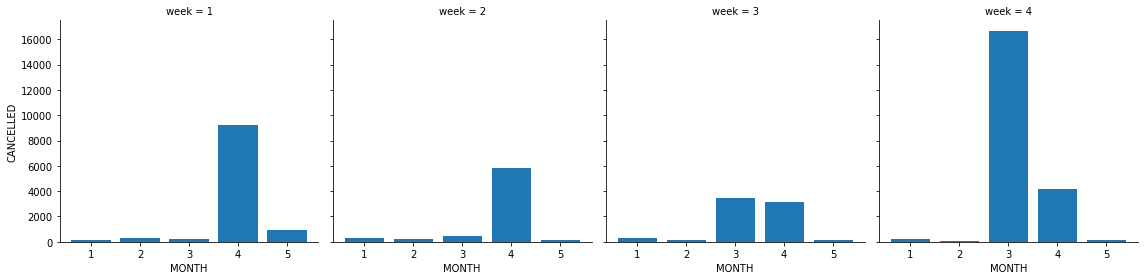

In [ ]:
cancelled_months = data.groupby(['MONTH', 'week'])['CANCELLED'].sum().reset_index()

fg = sns.FacetGrid(data=cancelled_months, col='week', size=4)

fg.map(plt.bar, 'MONTH', 'CANCELLED')

This graph is more representative that the previous one we had in the **bivariate analysis** section. it show that week four again has the largest number of cancelled flights especially in the month of March.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> I extended my investigation in the `MONTH`, `CANCELLED` and `DISTANCE` variables. they really need this investigation as they asked on many questions related to the dataset. also **multivariate analysis** has proved the correlation between our variables of interests especially `CANCELLED`, `MONTH` and the `DISTANCE`.

### Were there any interesting or surprising interactions between features?

> features like: `ARR_TIME` and `DEP_TIME` as well as `ARR_DELAY` and `DEP_DELAY` have interesting interaction. there is not a symmetric interaction but they have a strong correlation we have noticed in the bivariate and multivariate analysis.  